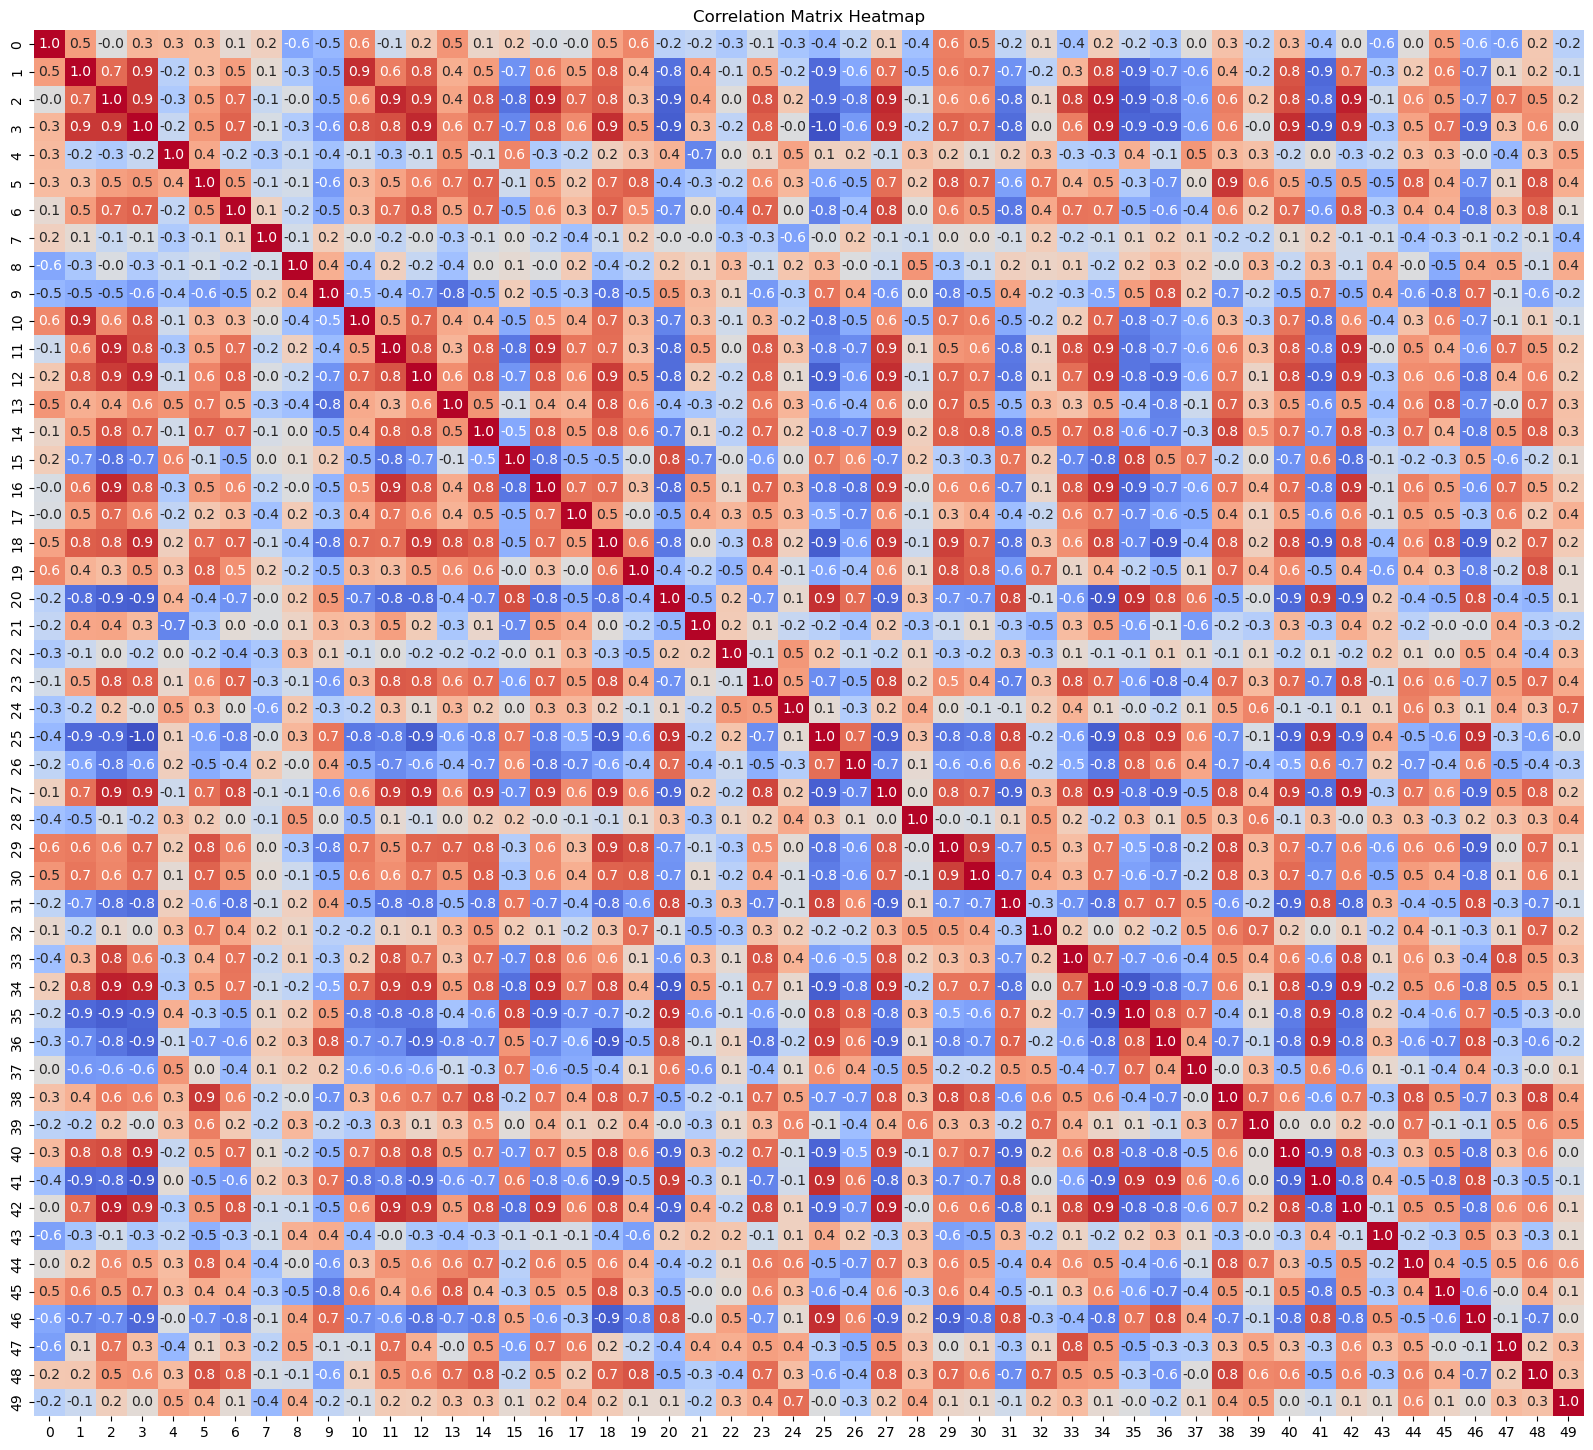

<Axes: title={'center': 'Correlation Matrix Heatmap'}>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

def get_prices() -> pd.DataFrame:
    return pd.read_csv('prices.txt', delim_whitespace="True", header=None)

def plot_corr_heatmap(corr_matrix):
    plt.figure(figsize=(20, 18))
    corr_heatmap = sb.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="coolwarm", annot=True, cbar=False, fmt=".1f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()
    return corr_heatmap


def plot_cov_heatmap(cov_matrix):
    plt.figure(figsize=(20, 18))
    cov_heatmap = sb.heatmap(
        cov_matrix, vmin=-1, vmax=1, cmap="coolwarm", annot=True, cbar=False, fmt=".1f")
    plt.title("Covariance Matrix Heatmap")
    plt.show()
    return cov_heatmap


prices = get_prices()

corr_matrix = round(prices.corr(), 2)
cov_matrix = round(prices.cov(), 2)

plot_corr_heatmap(corr_matrix)

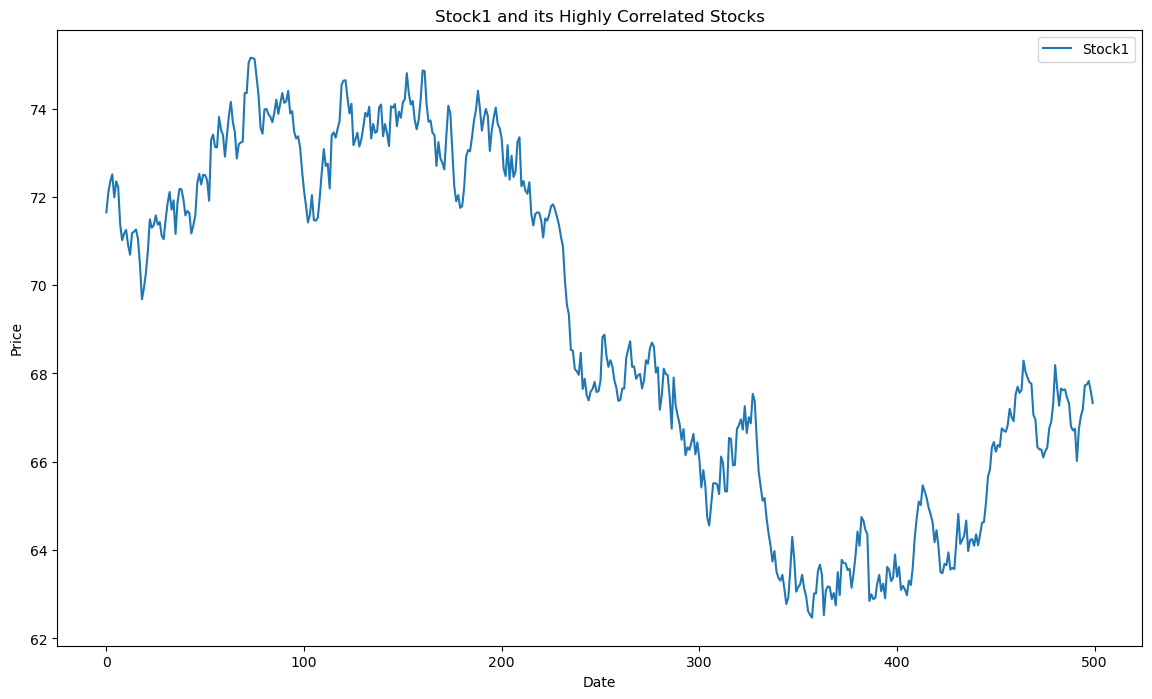

In [216]:
filteredDf = np.tril(corr_matrix[
    ((corr_matrix >= 0.7) | (corr_matrix <= -0.7)) & (corr_matrix != 1.000)
], k=-1)

def high_corr_list(corr_matrix: pd.DataFrame):
    correlated_stocks = []

    for i in range(len(corr_matrix)):
        correlated_stocks.append([])
        for j in range(len(corr_matrix)):
            if corr_matrix[i, j] != 0 and not np.isnan(corr_matrix[i, j]):
                correlated_stocks[i].append(j)

    return correlated_stocks


corrolated_stocks = high_corr_list(filteredDf)


def plot_correlated_stocks(stock_i, daily_prices, correlated_stocks):
    correlated_indices = correlated_stocks[stock_i]
    correlated_indices.append(stock_i)  # Include the given stock itself

    plt.figure(figsize=(14, 8))
    for idx in correlated_indices:
        plt.plot(daily_prices.index, daily_prices.iloc[:, idx], label=f"Stock{idx}")

    plt.title(f"Stock{stock_i} and its Highly Correlated Stocks")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

plot_correlated_stocks(1, prices, corrolated_stocks)